In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# 데이터 로드
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


- Pregnancies: 임신 횟수

- Glucose: 2시간 동안의 경구 포도당 내성 검사에서의 혈당 농도

- BloodPressure: 이완기 혈압 (mm Hg)

- SkinThickness: 삼두근 피부 두께 (mm)

- Insulin: 2시간 혈청 인슐린 (mu U/ml)

- BMI: 체질량 지수 (체중(kg) / 키(m)^2)

- DiabetesPedigreeFunction: 당뇨병 혈통 기능

- Age: 나이 (세)

- Outcome: 당뇨병 여부 (1: 당뇨병, 0: 정상)



In [ ]:
# 데이터 전처리
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 데이터를 Tensor로 변환합니다. PyTorch는 Tensor를 사용하여 데이터를 처리합니다.
# X_train, X_test는 입력 데이터, y_train, y_test는 정답 데이터입니다.
# .values를 통해 Pandas DataFrame에서 NumPy 배열을 추출합니다.
# dtype=torch.float32는 데이터 유형을 32비트 부동 소수점으로 지정합니다.
# .to(device)는 데이터를 지정된 장치 (CPU 또는 GPU)로 이동시킵니다.
# .view(-1, 1)은 y_train과 y_test의 차원을 (샘플 수, 1)로 조정합니다. 이진 분류에서 출력이 하나의 값이기 때문입니다.
X_train = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.values, dtype=torch.float32).to(device).view(-1,1)
X_test = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test.values, dtype=torch.float32).to(device).view(-1,1)


# 모델 정의
# nn.Module을 상속하여 신경망 모델을 정의합니다.
class Net(nn.Module):
    def __init__(self):
        # 부모 클래스의 생성자를 호출합니다.
        super(Net, self).__init__()
        # 첫 번째 선형 레이어 (Fully Connected Layer)를 정의합니다.
        # 입력 크기는 X_train의 열 개수, 출력 크기는 64입니다.
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        # ReLU 활성화 함수를 정의합니다.
        self.relu1 = nn.ReLU()
        # 두 번째 선형 레이어를 정의합니다. 입력 크기는 64, 출력 크기는 32입니다.
        self.fc2 = nn.Linear(64, 32)
        # ReLU 활성화 함수를 정의합니다.
        self.relu2 = nn.ReLU()
        # 세 번째 선형 레이어를 정의합니다. 입력 크기는 32, 출력 크기는 1입니다.
        self.fc3 = nn.Linear(32, 1)
        # 시그모이드 활성화 함수를 정의합니다. 이진 분류에서 출력을 확률로 변환하기 위해 사용됩니다.
        self.sigmoid = nn.Sigmoid()

    # 모델의 forward pass를 정의합니다. 입력 데이터가 모델을 통과하는 방식을 지정합니다.
    def forward(self, x):
        # 첫 번째 선형 레이어를 통과시키고 ReLU 활성화 함수를 적용합니다.
        x = self.fc1(x)
        x = self.relu1(x)
        # 두 번째 선형 레이어를 통과시키고 ReLU 활성화 함수를 적용합니다.
        x = self.fc2(x)
        x = self.relu2(x)
        # 세 번째 선형 레이어를 통과시키고 시그모이드 활성화 함수를 적용합니다.
        x = self.fc3(x)
        x = self.sigmoid(x)
        # 최종 결과를 반환합니다.
        return x

# Net 클래스의 인스턴스를 생성하여 모델을 생성합니다.
# .to(device)는 모델을 지정된 장치 (CPU 또는 GPU)로 이동시킵니다.
model = Net().to(device)

In [ ]:
# 손실 함수 및 옵티마이저 정의
criterion = nn.BCELoss() # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import matplotlib.pyplot as plt

# 학습 과정에서의 손실(loss)과 정확도(accuracy)를 저장할 리스트를 생성합니다.
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# 모델 학습 (epochs는 필요에 따라 조정)
epochs = 50
for epoch in range(epochs):
    # 1. 이전 epoch에서 계산된 gradient 값들을 0으로 초기화합니다.
    # - 기울기를 초기화하지 않으면 이전 학습의 기울기가 계속 누적됩니다
    # - 예: 첫 학습에서 기울기가 0.5, 다음 학습에서 0.3이 필요한 경우
    #   초기화를 안하면 0.5 + 0.3 = 0.8이 되어 실제 필요한 0.3보다 훨씬 큰 값으로 학습하게 됩니다
    # - 이렇게 되면 학습이 불안정해지고 정확한 결과를 얻을 수 없습니다
    optimizer.zero_grad()

    # 2. 모델에 학습 데이터 (X_train)를 입력하여 예측값 (outputs)을 얻습니다.
    # model(X_train)은 forward pass를 실행하는 것과 같습니다.
    outputs = model(X_train)

    # 3. 예측값 (outputs)과 실제값 (y_train)을 비교하여 손실 (train_loss)을 계산합니다.
    # criterion은 손실 함수를 나타내며, 여기서는 Binary Cross Entropy Loss를 사용합니다.
    train_loss = criterion(outputs, y_train)

    # 4. 손실 (train_loss)을 기반으로 모델의 각 가중치에 대한 gradient를 계산합니다.
    # backpropagation 과정을 통해 gradient를 계산합니다.
    train_loss.backward()

    # 5. 계산된 gradient를 사용하여 모델의 가중치를 업데이트합니다.
    # optimizer는 가중치를 업데이트하는 알고리즘을 나타내며, 여기서는 Adam optimizer를 사용합니다.
    # 이 단계를 통해 모델은 데이터를 더 잘 예측하도록 학습됩니다.
    optimizer.step()

    # --- 이 아래는 평가 과정입니다. ---

    # 6. 학습 데이터셋에 대한 정확도를 계산합니다.
    # with torch.no_grad(): 블록 안에서는 gradient를 계산하지 않습니다.
    # 평가 과정에서는 가중치를 업데이트할 필요가 없기 때문입니다.
    with torch.no_grad():
        # 모델에 학습 데이터를 다시 입력하여 예측값을 얻습니다.
        train_outputs = model(X_train)

        # 예측값이 0.5보다 크면 1 (당뇨병), 작으면 0 (정상)으로 분류합니다.
        train_pred = (train_outputs > 0.5).float()

        # 실제값 (y_train)과 예측값 (train_pred)을 비교하여 정확도 (train_acc)를 계산합니다.
        # accuracy_score는 sklearn.metrics에서 제공하는 함수입니다.
        train_acc = accuracy_score(y_train.cpu(), train_pred.cpu())

    # 7. 테스트 데이터셋에 대한 손실과 정확도를 계산합니다.
    # 학습 데이터셋과 동일한 방식으로 진행됩니다.
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_pred = (test_outputs > 0.5).float()
        test_acc = accuracy_score(y_test.cpu(), test_pred.cpu())

    train_losses.append(train_loss.item())
    train_accuracies.append(train_acc)
    test_losses.append(test_loss.item())
    test_accuracies.append(test_acc)

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc:.4f}')


Epoch [1/50], Train Loss: 0.8187, Train Acc: 0.6140, Test Loss: 0.7853, Test Acc: 0.5974
Epoch [2/50], Train Loss: 0.7467, Train Acc: 0.6124, Test Loss: 0.7161, Test Acc: 0.6429
Epoch [3/50], Train Loss: 0.6885, Train Acc: 0.6352, Test Loss: 0.6733, Test Acc: 0.6364
Epoch [4/50], Train Loss: 0.6503, Train Acc: 0.6580, Test Loss: 0.6539, Test Acc: 0.6429
Epoch [5/50], Train Loss: 0.6276, Train Acc: 0.6710, Test Loss: 0.6542, Test Acc: 0.6299
Epoch [6/50], Train Loss: 0.6236, Train Acc: 0.6808, Test Loss: 0.6582, Test Acc: 0.6364
Epoch [7/50], Train Loss: 0.6252, Train Acc: 0.6792, Test Loss: 0.6588, Test Acc: 0.6429
Epoch [8/50], Train Loss: 0.6262, Train Acc: 0.6743, Test Loss: 0.6584, Test Acc: 0.6818
Epoch [9/50], Train Loss: 0.6256, Train Acc: 0.6824, Test Loss: 0.6544, Test Acc: 0.6883
Epoch [10/50], Train Loss: 0.6207, Train Acc: 0.6857, Test Loss: 0.6508, Test Acc: 0.6688
Epoch [11/50], Train Loss: 0.6144, Train Acc: 0.6824, Test Loss: 0.6486, Test Acc: 0.6688
Epoch [12/50], Trai

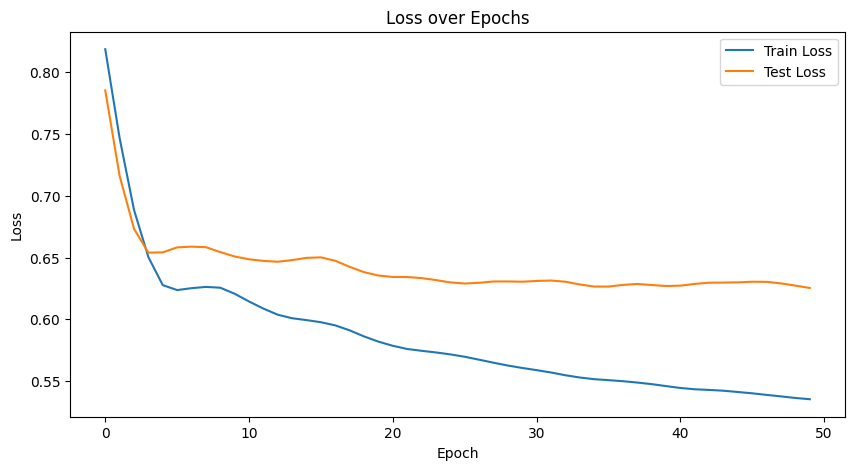

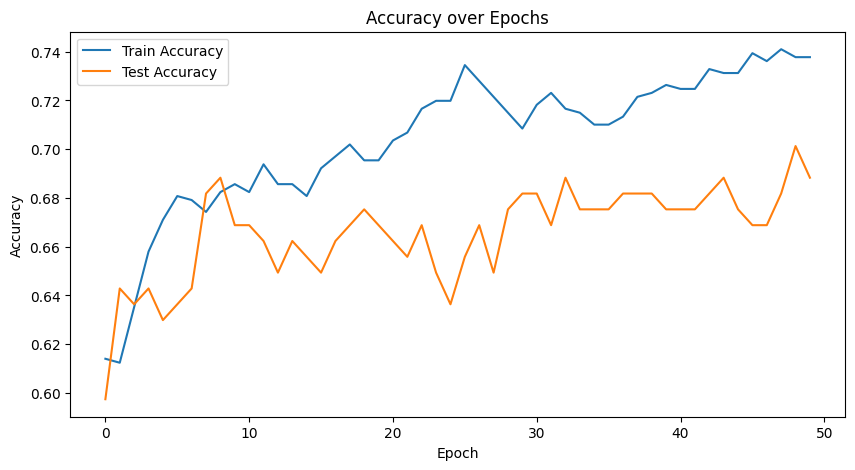

In [ ]:
# 손실 변화 시각화
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# 정확도 변화 시각화
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()